In [14]:
import csv
sourceFile = '201402_2000Trips.csv'
tripDurationDataFile = 'Extracted_DataSets/201402_TripDurationData.csv'
with open(sourceFile,"r") as source:
    rdr= csv.reader( source )
    with open(tripDurationDataFile,"w") as tripDurationData:
        wtr= csv.writer( tripDurationData )
        for r in rdr:
            wtr.writerow( (r [0], r[1], r[2] ) )

In [15]:
import datetime
import calendar
tripTimeDurationDataFile = 'Extracted_DataSets/201402_TripTimeDurationData.csv'
with open(sourceFile,"r") as source:
    rdr= csv.reader( source )
    r = next(rdr)
    with open(tripTimeDurationDataFile,"w") as tripDurationData:
        wtr= csv.writer( tripDurationData )
        wtr.writerow( (r [0], r[1], r[2], r[5], 'Day') )
        for r in rdr:
            # Sample start time '8/29/13 14:13'
            startDate = datetime.datetime.strptime(r[2], '%m/%d/%Y %H:%M').date()
            wtr.writerow( (r [0], r[1], r[2], r[5], startDate.weekday()) )
        

In [16]:

stationFile = '201402_station_data.csv'
with open(stationFile,"r") as source:
    rdr= csv.reader( source )
    stationsById={}
    stationsByName={}
    next(rdr)
    for r in rdr:
        stationInfo={'id':r[0],'name':r[1],'lat':r[2],'long':r[3],'dockCount':r[4]}
        stationsById[r[0]] = stationInfo
        stationsByName[r[1]] = stationInfo

In [18]:
import datetime
import calendar
stationsTripDataFile = 'Extracted_DataSets/201402_StationsTripData.csv'
with open(sourceFile,"r") as source:
    rdr= csv.reader( source )
    r = next(rdr)
    with open(stationsTripDataFile,"w") as stationsTripData:
        wtr= csv.writer( stationsTripData )
        wtr.writerow( (r [0], r[1], r[2], r[5], 'Start Station Id', 'End Station Id', 'Day') )
        for r in rdr:
            # Sample start time '8/29/13 14:13'
            startDate = datetime.datetime.strptime(r[2], '%m/%d/%Y %H:%M').date()
            startStationId = stationsByName[r[3]]['id']
            endStationId = stationsByName[r[6]]['id']
            wtr.writerow( (r [0], r[1], r[2], r[5], startStationId, endStationId, startDate.weekday()) )


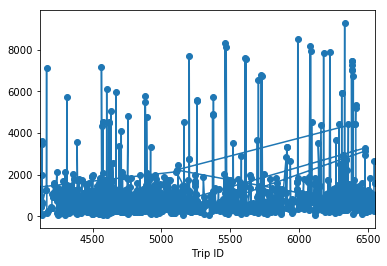

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(tripDurationDataFile, index_col='Trip ID')
df  = df.sort_values(by="Start Date", ascending=True, axis=0)
df.to_csv(tripDurationDataFile)
df

s = df.ix[:,0]
cleanedS = s[lambda x :x < 10000]

type(cleanedS)
cleanedS.plot.line()

import matplotlib.pyplot as plt
plt.scatter(cleanedS.index, cleanedS)
plt.show()

In [36]:
df = pd.read_csv(tripTimeDurationDataFile, index_col='Trip ID')
df  = df.sort_values(by="Start Date", ascending=True, axis=0)
df.to_csv(tripTimeDurationDataFile)

In [37]:
df = pd.read_csv(stationsTripDataFile, index_col='Trip ID')
df  = df.sort_values(by="Start Date", ascending=True, axis=0)
df.to_csv(stationsTripDataFile)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tripDurationDataFile = 'Extracted_DataSets/201402_TripDurationData.csv'
df = pd.read_csv(tripDurationDataFile)

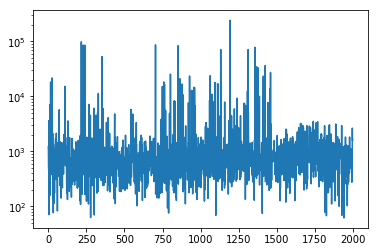

In [6]:
plt.yscale('log')
plt.plot(df['Duration'])
